<a href="https://colab.research.google.com/github/MaLuisa7/data_processing_and_classification_MasterDS/blob/main/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 3:​
​
Visualización preliminar de los datos. Mencionen las conclusiones que tienen después de hacer este análisis visual. (Es diferente a la idea inicial que tenían de los datos.  Cambia el objetivo final que tenían al iniciar el procesamiento) ​

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re
%matplotlib inline
import os

import seaborn as sns
import string
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from concurrent.futures import ProcessPoolExecutor
import multiprocessing

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_root = "/content/drive/MyDrive/procesamiento_clasificacion_datos/"

In [ ]:
data = pd.read_csv(path_root +  "data_eda_practica2.csv")
data.head()

,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length
0,0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.00
1,1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.75
2,2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.50
3,3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.00
4,4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.40


In [6]:
# STOPWORDS = set(stopwords.words('english'))
# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# data['x'] = data['x'].apply(lambda text: cleaning_stopwords(text))
# data['x'].head()


STOPWORDS = set(stopwords.words('english'))

def cleaning_stopwords_parallel(text):
    return " ".join([word for word in word_tokenize(text) if word not in STOPWORDS])

def apply_parallel(df, func, num_processes=4):
    with ProcessPoolExecutor(max_workers=num_processes) as executor:
        results = list(executor.map(func, df['x']))
    return pd.Series(results, index=df.index)


# reviews_not_stopwords = apply_parallel(reviews, cleaning_stopwords_parallel) donotuse
# fourmilion = 4000000
# step = 100000
# lst_reviews_not_stop_words = []
# for i in range(2200000, fourmilion  , step):
#   # print(i, i + 100000)
#   reviews = pd.DataFrame(data.loc[i :i + step,'x'])
#   reviews_not_stopwords = apply_parallel(reviews, cleaning_stopwords_parallel)
#   reviews_not_stopwords.to_csv(path_root + f"revies_not_stopwords_{i}.csv")
#   # lst_reviews_not_stop_words.append(reviews_not_stopwords)
#   print(i) #9:44 a 951 se corrieron 3 10:40 -- tarda como 50 minutos  / 9:54 -1024 1 900 000-
#   del reviews_not_stopwords , reviews

# path_root_not_stopwords = "/content/drive/MyDrive/procesamiento_clasificacion_datos/reviews_not_stopwords/"
# lst_no_sw = []
# for i in range(0, 4000000  , 100000):
#   path_not_stopwords = path_root_not_stopwords + f"revies_not_stopwords_{i}.csv"
#   df1 = pd.read_csv(path_not_stopwords)
#   lst_no_sw.append(df1)

# data_no_stopwords = pd.concat(lst_no_sw).reset_index(drop=True)
# data_no_stopwords.columns = ['idx', 'x_not_stopwords']
# data_no_stopwords = data_no_stopwords.drop_duplicates(subset = ['idx']).reset_index(drop=True)
# data_no_stopwords.tail()


# data['no_stopwords'] = data_no_stopwords.x_not_stopwords
# data['Word_count_sw'] = data['no_stopwords'].apply(word_count)

# data.tail()

In [7]:
data  = pd.read_csv("/content/drive/MyDrive/procesamiento_clasificacion_datos/data_con_stopwords_20231005.csv")

In [9]:
data = data.iloc[:, 2:]
data.head()

,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw
0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.00,Stuning even non-gamer : This sound track beau...,58
1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.75,The best soundtrack ever anything . : I 'm rea...,67
2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.50,Amazing ! : This soundtrack favorite music tim...,115
3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.00,Excellent Soundtrack : I truly like soundtrack...,112
4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.40,"Remember , Pull Your Jaw Off The Floor After H...",77


In [10]:
data['Length_sw'] = data['no_stopwords'].str.len()

def word_count(review):
    review_list = review.split()
    return len(review_list)
data['mean_word_length_sw'] = data['no_stopwords'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data['mean_sent_length_sw'] = data['no_stopwords'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

In [14]:
data.to_csv('data_awsreviews_20231005.gz', compression='gzip')

In [11]:
data.head(10)

,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw
0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.000000,Stuning even non-gamer : This sound track beau...,58,322,4.568966,45.142857
1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.750000,The best soundtrack ever anything . : I 'm rea...,67,367,4.492537,91.000000
2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.500000,Amazing ! : This soundtrack favorite music tim...,115,622,4.417391,154.750000
3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.000000,Excellent Soundtrack : I truly like soundtrack...,112,639,4.714286,159.000000
4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.400000,"Remember , Pull Your Jaw Off The Floor After H...",77,388,4.051948,76.800000
5,an absolute masterpiece: I am quite sure any o...,1,825,142,4.816901,205.500000,absolute masterpiece : I quite sure actually t...,104,604,4.817308,150.250000
6,"Buyer beware: This is a self-published book, a...",0,738,139,4.316547,104.571429,"Buyer beware : This self-published book , want...",109,563,4.174312,79.571429
7,Glorious story: I loved Whisper of the wicked ...,1,522,105,3.980952,57.222222,Glorious story : I loved Whisper wicked saints...,64,341,4.343750,37.000000
8,A FIVE STAR BOOK: I just finished reading Whis...,1,524,103,4.097087,74.000000,A FIVE STAR BOOK : I finished reading Whisper ...,70,369,4.285714,51.857143
9,Whispers of the Wicked Saints: This was a easy...,1,301,63,3.793651,74.500000,Whispers Wicked Saints : This easy read book m...,42,208,3.976190,51.250000


In [13]:
data.loc[:, ['x', 'no_stopwords']].head(10)

,x,no_stopwords
0,Stuning even for the non-gamer: This sound tra...,Stuning even non-gamer : This sound track beau...
1,The best soundtrack ever to anything.: I'm rea...,The best soundtrack ever anything . : I 'm rea...
2,Amazing!: This soundtrack is my favorite music...,Amazing ! : This soundtrack favorite music tim...
3,Excellent Soundtrack: I truly like this soundt...,Excellent Soundtrack : I truly like soundtrack...
4,"Remember, Pull Your Jaw Off The Floor After He...","Remember , Pull Your Jaw Off The Floor After H..."
5,an absolute masterpiece: I am quite sure any o...,absolute masterpiece : I quite sure actually t...
6,"Buyer beware: This is a self-published book, a...","Buyer beware : This self-published book , want..."
7,Glorious story: I loved Whisper of the wicked ...,Glorious story : I loved Whisper wicked saints...
8,A FIVE STAR BOOK: I just finished reading Whis...,A FIVE STAR BOOK : I finished reading Whisper ...
9,Whispers of the Wicked Saints: This was a easy...,Whispers Wicked Saints : This easy read book m...


In [22]:
#word cloud function
def wordcloud(texto, tipo = 'positive'):
  from wordcloud import WordCloud, STOPWORDS

  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in texto:

      # typecaste each val to string
      val = str(val)
      # split the value
      tokens = val.split()
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
  plt.figure(figsize = (8, 3), facecolor = None)
  plt.title(f'wordcloud for {tipo} words (first 100,000)')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()


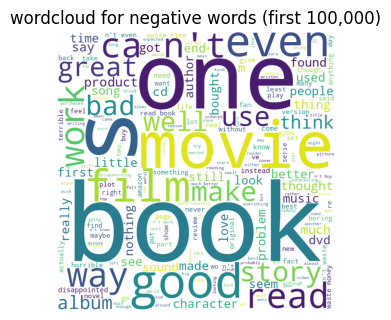

In [20]:
negativo = data.query("y == 0").no_stopwords.iloc[:100000]
wordcloud(negativo, tipo='negative')

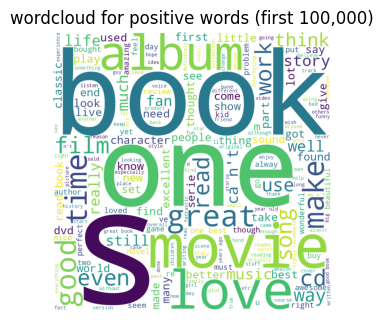

In [23]:
positivo = data.query("y == 1").no_stopwords.iloc[:100000]
wordcloud(positivo, tipo = 'positive')

In [24]:
data.columns

Index(['x', 'y', 'Length', 'Word_count', 'mean_word_length',
       'mean_sent_length', 'no_stopwords', 'Word_count_sw', 'Length_sw',
       'mean_word_length_sw', 'mean_sent_length_sw'],
      dtype='object')

In [25]:
data.loc[:, [ 'Length', 'Word_count', 'mean_word_length',
       'mean_sent_length', 'Word_count_sw', 'Length_sw',
       'mean_word_length_sw', 'mean_sent_length_sw'] ].head()

,Length,Word_count,mean_word_length,mean_sent_length,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw
0,426,80,4.337500,60.00,58,322,4.568966,45.142857
1,509,97,4.257732,126.75,67,367,4.492537,91.000000
2,760,129,4.899225,189.50,115,622,4.417391,154.750000
3,743,118,5.305085,185.00,112,639,4.714286,159.000000
4,481,87,4.540230,95.40,77,388,4.051948,76.800000


<Axes: >

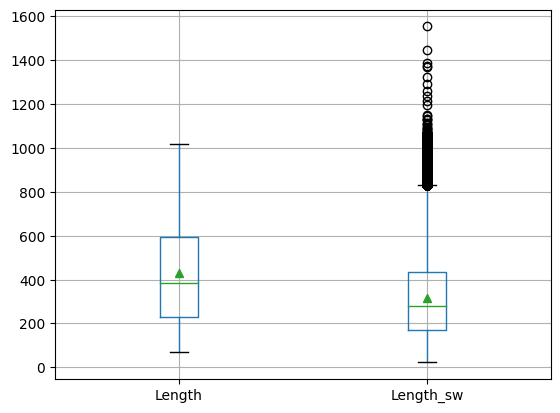

In [27]:
data.loc[:, ['Length',   'Length_sw'] ].boxplot(showmeans=True)

<Axes: >

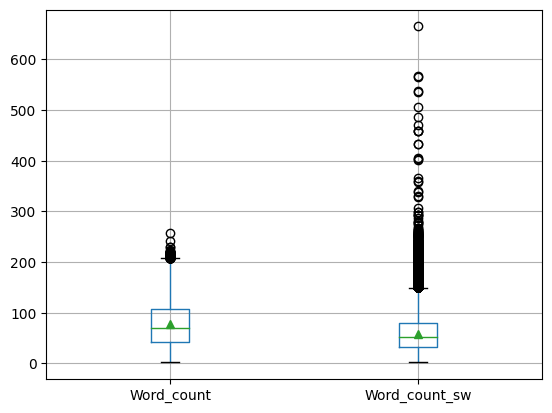

In [28]:
data.loc[:, [ 'Word_count',   'Word_count_sw'] ].boxplot(showmeans=True)

<Axes: >

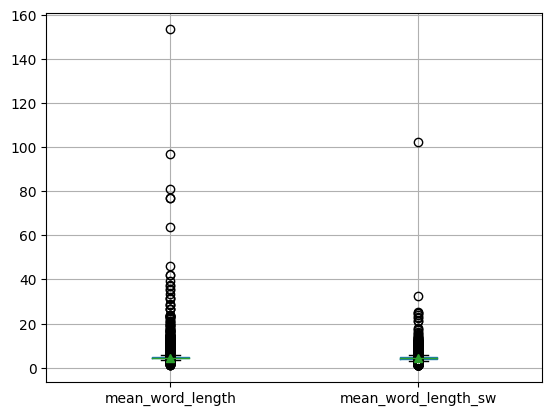

In [29]:
data.loc[:, [  'mean_word_length',  'mean_word_length_sw'] ].boxplot(showmeans=True)

<Axes: >

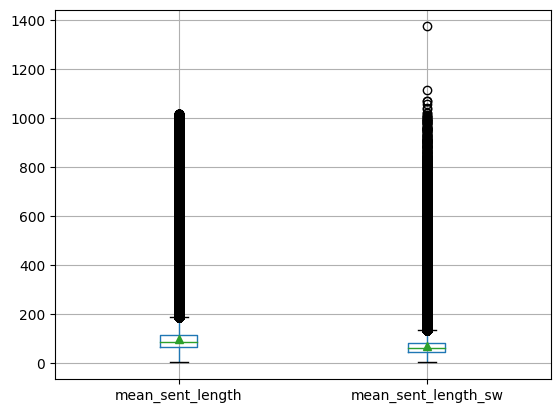

In [30]:
data.loc[:, [  'mean_sent_length',  'mean_sent_length_sw'] ].boxplot(showmeans=True)

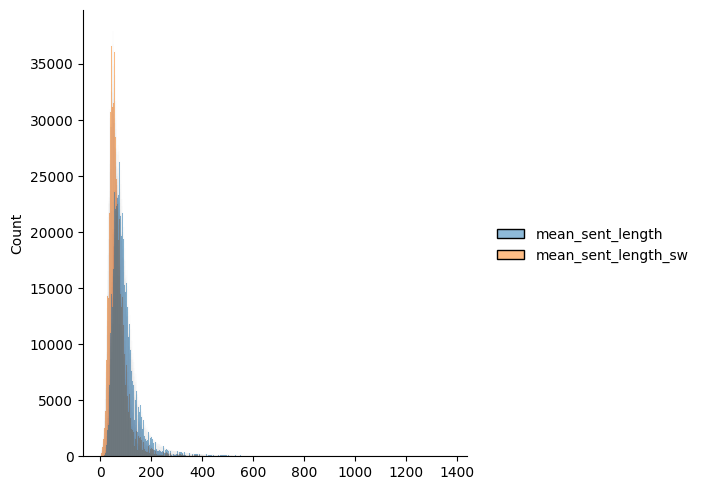

In [31]:
sns.displot(data.loc[:, [  'mean_sent_length',  'mean_sent_length_sw'] ])

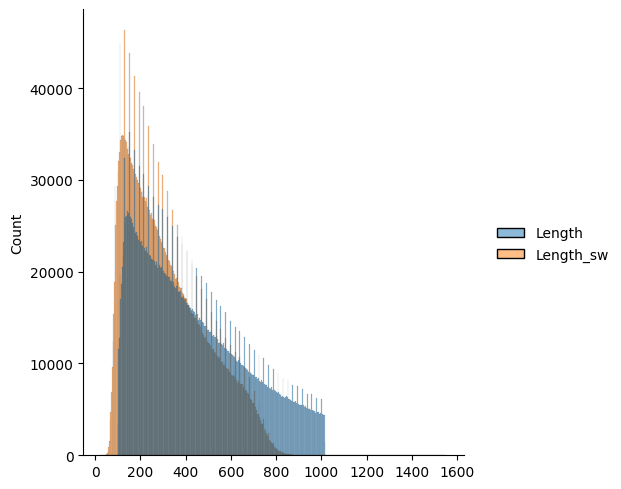

In [32]:
sns.displot(data.loc[:, ['Length',   'Length_sw'] ])

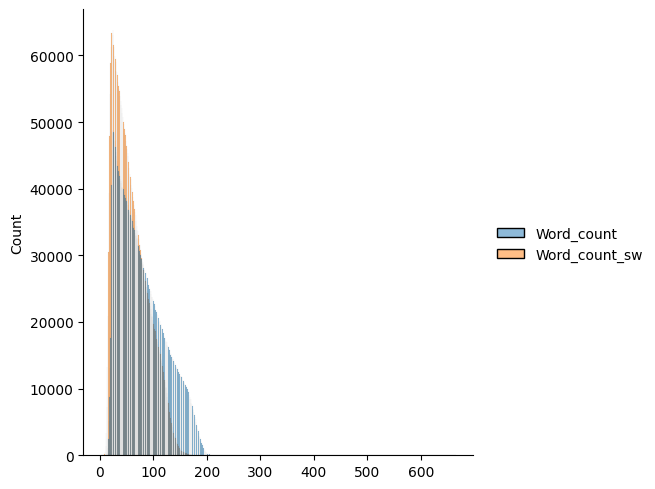

In [33]:
sns.displot(data.loc[:, [ 'Word_count',   'Word_count_sw'] ])

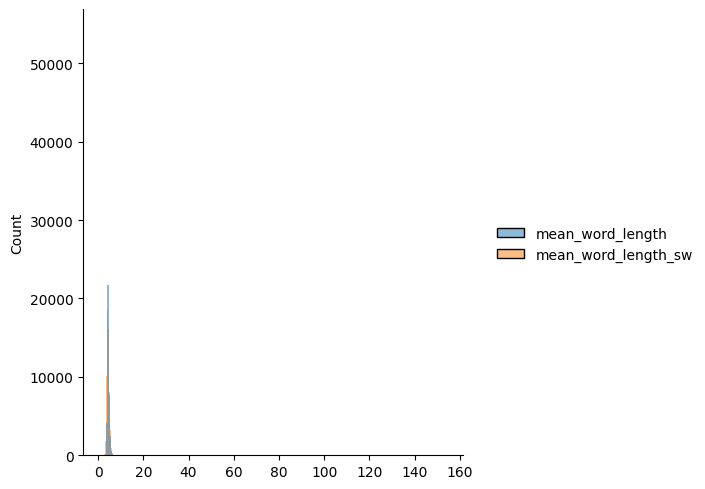

In [34]:
sns.displot(data.loc[:, [  'mean_word_length',  'mean_word_length_sw'] ])

In [ ]:

english_punctuations = string.punctuation #quitamos signos de puntuacion
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data['x']= data['x'].apply(lambda x: cleaning_punctuations(x))
data['x'].tail()

In [ ]:

def cleaning_numbers(data): #quitamos numeros
    return re.sub('[0-9]+', '', data)
data['x'] = data['x'].apply(lambda x: cleaning_numbers(x))
data['x'].tail()

In [ ]:

def cleaning_non_alphanumeric(data):#quitamos todo aquello que no sea alfanumerico
  return re.sub(r'[^\w\s]', '', data )
data['x'] = data['x'].apply(lambda x: cleaning_non_alphanumeric(x))
data['x'].tail()

399995    Unbelievable In Bad Way We bought Thomas son h...
399996    Almost Great Until Broke My son recieved birth...
399997    Disappointed  I bought toy son loves Thomas to...
399998    Classic Jessica Mitford This compilation wide ...
399999    Comedy Scene Not Heard This DVD disappointment...
Name: x, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') #tokenizamos
data['x2'] = data['x'].apply(tokenizer.tokenize)